In [1]:
## all imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sympy import Point, Polygon


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# load libraries and magics
# load libraries and magics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.svm import SVC
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import datetime
from time import time
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.manifold import Isomap
warnings.filterwarnings('ignore')
import cv2

plt.style.use('bmh')
plt.rcParams['axes.grid'] = False

warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

## Question - 1

In [4]:
model_1 = tf.keras.models.load_model('model_b_1')
model_1.summary()

2022-12-10 21:26:23.409484: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 21:26:24.249110: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16875)             0         
                                                                 
 dense_b_1 (Dense)           (None, 75)                1265700   
                                                                 
 dropout (Dropout)           (None, 75)                0         
                                                                 
 dense_b_2 (Dense)           (None, 50)                3800      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
Total params: 1,270,010
Trainable params: 1,270,010
Non-

In [5]:
model_2 = tf.keras.models.load_model('model_h_1')
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16875)             0         
                                                                 
 dense (Dense)               (None, 224)               3780224   
                                                                 
 dropout (Dropout)           (None, 224)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2250      
                                                                 
Total params: 3,782,474
Trainable params: 3,782,474
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_3 = tf.keras.models.load_model('model_t_1')
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 75, 75, 3)         0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 20,881,970
Trainable params: 20,490
Non-trainable params: 20,861,480
____________________________________________

In [7]:
X_test_1 = joblib.load('X_test_rs.pkl')
t_test_1 = joblib.load('t_test.pkl')


In [8]:
y_test_1 = np.argmax(model_1.predict(X_test_1),axis=1)
y_test_1.shape

2022-12-10 21:26:32.438539: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


(332,)

In [9]:
print(classification_report(t_test_1, y_test_1, target_names=class_names))

               precision    recall  f1-score   support

        Roses       0.17      0.58      0.26        36
    Magnolias       0.09      0.06      0.07        36
       Lilies       0.00      0.00      0.00        41
   Sunflowers       0.00      0.00      0.00        28
      Orchids       0.25      0.91      0.39        35
     Marigold       0.46      0.19      0.27        31
     Hibiscus       0.00      0.00      0.00        32
     Firebush       0.28      0.24      0.25        34
       Pentas       0.00      0.00      0.00        32
Bougainvillea       0.00      0.00      0.00        27

     accuracy                           0.21       332
    macro avg       0.12      0.20      0.12       332
 weighted avg       0.12      0.21      0.13       332



In [10]:
y_test_2 = np.argmax(model_2.predict(X_test_1),axis=1)
y_test_2.shape

(332,)

In [11]:
print(classification_report(t_test_1, y_test_2, target_names=class_names))

               precision    recall  f1-score   support

        Roses       1.00      0.08      0.15        36
    Magnolias       0.38      0.61      0.47        36
       Lilies       0.17      0.34      0.23        41
   Sunflowers       0.33      0.21      0.26        28
      Orchids       0.40      0.66      0.50        35
     Marigold       0.41      0.45      0.43        31
     Hibiscus       0.24      0.22      0.23        32
     Firebush       0.57      0.62      0.59        34
       Pentas       0.10      0.03      0.05        32
Bougainvillea       0.50      0.11      0.18        27

     accuracy                           0.34       332
    macro avg       0.41      0.33      0.31       332
 weighted avg       0.41      0.34      0.31       332



In [12]:
y_test_3 = np.argmax(model_3.predict(X_test_1),axis=1)
y_test_3.shape

2022-12-10 21:26:33.669811: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-12-10 21:26:34.569365: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-12-10 21:26:34.681006: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


(332,)

In [13]:
print(classification_report(t_test_1, y_test_3, target_names=class_names))

               precision    recall  f1-score   support

        Roses       0.31      0.36      0.33        36
    Magnolias       0.49      0.53      0.51        36
       Lilies       0.34      0.34      0.34        41
   Sunflowers       0.32      0.21      0.26        28
      Orchids       0.52      0.31      0.39        35
     Marigold       0.52      0.48      0.50        31
     Hibiscus       0.36      0.38      0.37        32
     Firebush       0.56      0.44      0.49        34
       Pentas       0.30      0.53      0.38        32
Bougainvillea       0.29      0.26      0.27        27

     accuracy                           0.39       332
    macro avg       0.40      0.38      0.38       332
 weighted avg       0.40      0.39      0.39       332



## Question_2

In [14]:
# import Point, Polygon
from sympy import Point, Polygon

# creating points using Point()
# the four coordinates of rectangle given xmin,ymin and xmax, ymax
# To find union and intersection of two polygons we need to map it to coordinate points
# Hence using xmin,ymin,xmax,ymax we will find the four coordinates
# The four coordinates will be
# Xmin,Ymin
# Xmax,Ymin
# Xmax,Ymax
# Xmin,Ymax

def find_intersect_union_ratio(i,y_pred,t_train):
    Xmin1 = y_pred[i][0]
    Ymin1 = y_pred[i][1]
    Xmax1 = y_pred[i][2]
    Ymax1 = y_pred[i][3]

    Xmin2 = t_train[i][0]
    Ymin2 = t_train[i][1]
    Xmax2 = t_train[i][2]
    Ymax2 = t_train[i][3]

    from shapely.geometry import Polygon
    polygon = Polygon([(Xmin1, Ymin1), (Xmin1, Ymax1), (Xmax1, Ymax1), (Xmax1, Ymin1)])
    other_polygon = Polygon([(Xmin2, Ymin2), (Xmin2, Ymax2), (Xmax2, Ymax2), (Xmax2, Ymin2)])
    
    # creating polygons using Polygon()
    
    intersect_area = polygon.intersection(other_polygon).area
    union_area = polygon.union(other_polygon).area
    
    # find the ratio of intersection over union
    print("intersection")
    print(intersect_area)
    print("union")
    print(union_area)
    
    ratio_metric = intersect_area/union_area
    
    return ratio_metric

## this will return two new polygons
## intersect_area will encapsulate the points which form the intersection
## union_area will encapsulate the points which form the union


In [15]:
## find score of all interection over union for each image

def find_total_ratio(y_pred,t_train):
    n = len(y_pred)
    ans = 0
    for i in range(len(y_pred)):
        ans += find_intersect_union_ratio(i,y_pred,t_train)
    
    avg = ans/n
    return avg

## Question - 3

In [16]:
from PIL import Image
import cv2 # install opencv, if you don't already have it (https://pypi.org/project/opencv-python/)
import pandas as pd

In [17]:
bbox = pd.read_csv('car_detection_dataset/train_bounding_boxes.csv')
bbox

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [18]:
bbox_2 = pd.read_csv('car_detection_dataset/test_bounding_boxes.csv')
bbox_2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,object,138,179,75,47,vid_5_27440.jpg,676,380
1,object,398,163,207,79,vid_5_27480.jpg,676,380
2,object,195,169,139,66,vid_5_27860.jpg,676,380
3,object,478,149,190,85,vid_5_27900.jpg,676,380
4,object,357,179,125,62,vid_5_29460.jpg,676,380
5,object,324,167,146,67,vid_5_31100.jpg,676,380
6,object,342,166,130,64,vid_5_31140.jpg,676,380
7,object,361,169,181,86,vid_5_31600.jpg,676,380


In [19]:
bbox_2 = bbox_2.drop(['label_name','image_width','image_height'],axis=1)
bbox_2

,bbox_x,bbox_y,bbox_width,bbox_height,image_name
0,138,179,75,47,vid_5_27440.jpg
1,398,163,207,79,vid_5_27480.jpg
2,195,169,139,66,vid_5_27860.jpg
3,478,149,190,85,vid_5_27900.jpg
4,357,179,125,62,vid_5_29460.jpg
5,324,167,146,67,vid_5_31100.jpg
6,342,166,130,64,vid_5_31140.jpg
7,361,169,181,86,vid_5_31600.jpg


In [20]:
N = len(bbox_2) # no. of training samples

# Create a numpy array with all images
for i in range(N): 
    filename='car_detection_dataset/testing_images/'+bbox_2['image_name'][i]
    image = np.array(Image.open(filename))
    image_col = image.ravel()[:,np.newaxis]
    
    if i==0:
        X_test = image_col
    else:
        X_test = np.hstack((X_test, image_col))

# Training feature matrices
X_test = X_test.T

# Training labels
t_test = bbox_2.drop('image_name', axis=1).round().to_numpy().astype(int)

X_test.shape, t_test.shape

((8, 770640), (8, 4))

In [21]:
model_4 = tf.keras.models.load_model('model_h_3')
model_4.summary()
                                     
                                     
                                     

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380, 676, 3)]     0         
                                                                 
 resizing (Resizing)         (None, 300, 300, 3)       0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 20,815,148
Non-trainable params: 54,528
____________________________________________

In [22]:
## reshape the validation data input

X_test_rs = tf.constant(X_test.reshape((X_test.shape[0],380,676,3)), 
                         dtype=tf.float32)

X_test_rs.shape


TensorShape([8, 380, 676, 3])

In [23]:
labels=model_4.predict(X_test_rs)

In [24]:
import math


5


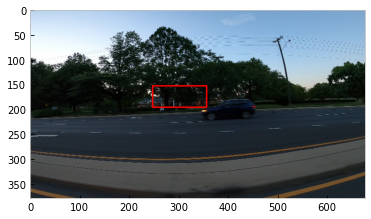

In [25]:
idx=N-3
print(idx)
filename='car_detection_dataset/testing_images/'+bbox_2['image_name'][idx]
image = np.array(Image.open(filename))
#image = np.array(Image.open(filename))
x= image

#plt.imshow(x)

cv2.rectangle(x, (math.floor(labels[idx,0]),math.floor(labels[idx,1])), 
              (math.floor(labels[idx,2]),math.floor(labels[idx,3])), 
              (255, 0, 0), 2);

plt.imshow(x)

In [26]:
labels

array([[349.60843, 142.58209, 452.74124, 188.59296],
       [204.95705, 154.64957, 331.15408, 203.9924 ],
       [159.31645, 162.52872, 250.02768, 196.39696],
       [329.08023, 113.05589, 408.21417, 145.86852],
       [308.86453, 154.71066, 412.90955, 193.38823],
       [247.19167, 154.84282, 356.5378 , 197.60397],
       [290.17773, 153.34225, 391.90176, 193.73315],
       [214.93575, 160.186  , 320.3443 , 197.42702]], dtype=float32)

In [27]:
t_test

array([[138, 179,  75,  47],
       [398, 163, 207,  79],
       [195, 169, 139,  66],
       [478, 149, 190,  85],
       [357, 179, 125,  62],
       [324, 167, 146,  67],
       [342, 166, 130,  64],
       [361, 169, 181,  86]])

In [28]:
for i,list in enumerate(t_test):
    t_test[i][2]=t_test[i][0]+t_test[i][2]
    t_test[i][3]=t_test[i][1]+t_test[i][3]
t_test

array([[138, 179, 213, 226],
       [398, 163, 605, 242],
       [195, 169, 334, 235],
       [478, 149, 668, 234],
       [357, 179, 482, 241],
       [324, 167, 470, 234],
       [342, 166, 472, 230],
       [361, 169, 542, 255]])

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(t_test, labels)

In [30]:
res = find_intersect_union_ratio(5,labels,t_test)
res

intersection
995.7863105172291
union
13461.981081182836


0.073970265186982

In [31]:
total_ratio_score_test = find_total_ratio(labels,t_test)
total_ratio_score_test

intersection
0.0
union
8270.229836463928
intersection
0.0
union
22579.919494957663
intersection
1507.5909893908538
union
10738.63866379601
intersection
0.0
union
18746.59212030843
intersection
804.4393703658134
union
10969.768558425363
intersection
995.7863105172291
union
13461.981081182836
intersection
1383.9333183690906
union
11044.791751650162
intersection
0.0
union
19491.521287714364


0.051624243270382494